## <center>  Основные метода машинного обучения - Обучение с учителем

# <center> Задача регрессии
Расммотрим задачу регрессии - задачу когда нам необходимо восстановить некоторую функцию.  
Примеры: физические измерения, хотим узнать цену на автомобиль, зарплату на вакансии  
Главное отличие от других задач машинного обучения: целевой признак - ответ - y $ \in R$  
Сентезируем задачу:  
Пусть мы имеем 100 измерений по X, распределенных равномерно на отрезке [0;5]  
Пусть истинная зависимость y(x) = 1.1*x+0.7

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import datasets
import matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
__xRegression__ = np.random.uniform(0,5,size=(100,1))

In [3]:
def y(x):
    return 1.1*x+.7

Измерения по y cо случайным шумом, распределенным равномерно на [-0.3;0.3]

In [4]:
__yRegression__ = y(__xRegression__) + np.random.uniform(-.3,.3,size=(100,1))

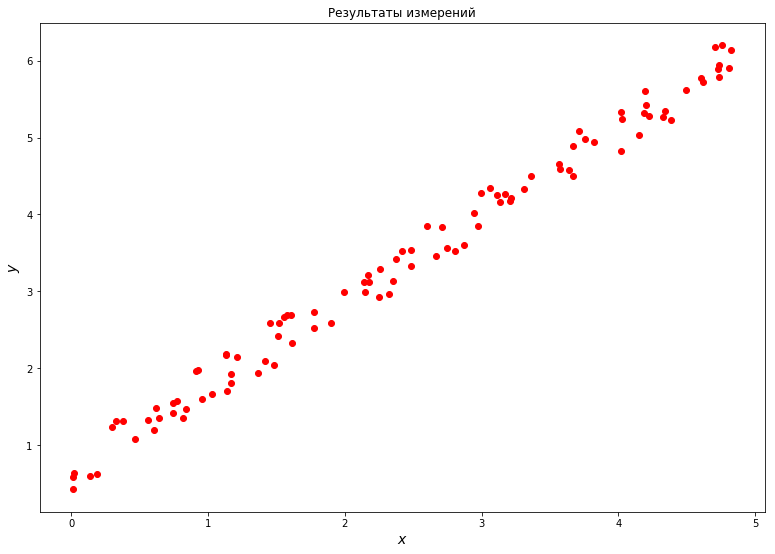

In [5]:
plt.figure(figsize=(13, 9))
plt.title('Результаты измерений')
plt.xlabel(r'$x$',fontsize=14)
plt.ylabel(r'$y$',fontsize=14)
plt.scatter(__xRegression__, __yRegression__, c='r')
plt.show()

# <center> Линейная регрессия

Линейная регрессионная модель сводится к сумме признаков объектов с некоторыми весами (параметры модели): 
$$
a(x)=w_0+w_1x_1+w_2x_2+\dots +w_dx_d=(\vec w,\vec x)
$$
Здесь $\vec w =\{w_0,w_1,w_2 \dots w_d \}$ - вектор весов, $\vec x =\{1,x_1,x_2 \dots x_d \}$ - вектор признаков с единичным признаком. 

In [6]:
__LinearModel__ = LinearRegression(n_jobs=-1)

In [7]:
__LinearModel__.fit(__xRegression__,__yRegression__)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Посмотрим на найденные веса модели

In [8]:
__LinearModel__.intercept_[0]

0.6746154074571256

In [9]:
__LinearModel__.coef_[0][0]

1.1105511643134782

In [10]:
def f(x):
    return __LinearModel__.intercept_[0] + x * __LinearModel__.coef_[0][0]

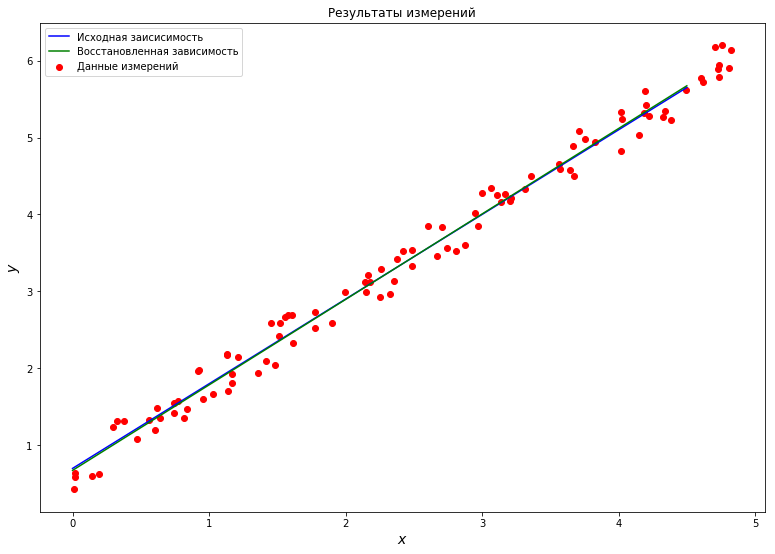

In [11]:
x = np.arange(0, 5.0, 0.5)
plt.figure(figsize=(13, 9))
plt.title('Результаты измерений')
plt.xlabel(r'$x$',fontsize=14)
plt.ylabel(r'$y$',fontsize=14)
plt.scatter(__xRegression__, __yRegression__, c='r')
plt.plot(x,y(x),c='b')
plt.plot(x,f(x),c='g')
plt.legend(['Исходная заисисимость','Восстановленная зависимость','Данные измерений'])
plt.show()

Но что делать, если исходная зависимость нелинейная?  
Рассмотрим $ y(x) = 0.653 x^3 + x + 1.789 $

In [12]:
def y2(x):
    return 0.653*x**3 + x + 1.789

In [13]:
__xRegression2__ = np.random.uniform(1,10,size=(100,1))

In [14]:
__yRegression2__ = y2(__xRegression2__) + np.random.uniform(-3,3,size=(100,1))

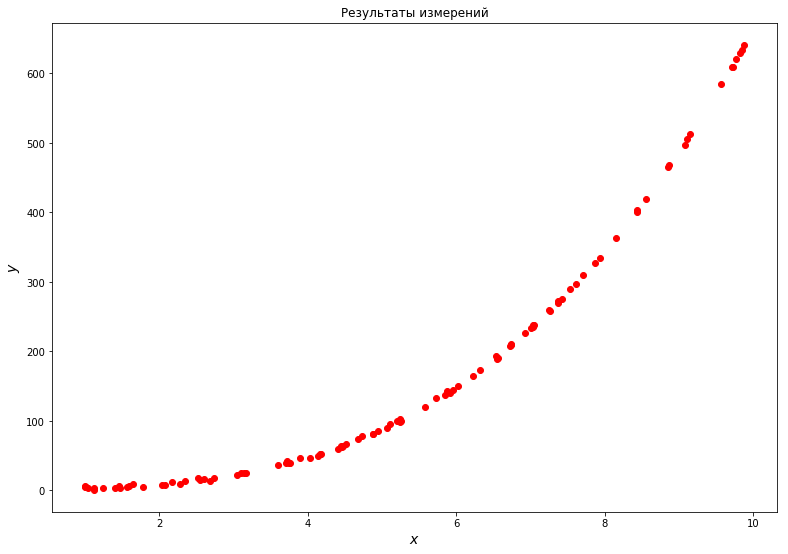

In [15]:
plt.figure(figsize=(13, 9))
plt.title('Результаты измерений')
plt.xlabel(r'$x$',fontsize=14)
plt.ylabel(r'$y$',fontsize=14)
plt.scatter(__xRegression2__, __yRegression2__, c='r')
plt.show()

Попробуем сделать тоже самое, что в первом примере

In [16]:
__LinearModel__.fit(__xRegression2__,__yRegression2__)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [17]:
def f(x):
    return __LinearModel__.intercept_[0] + x * __LinearModel__.coef_[0][0]

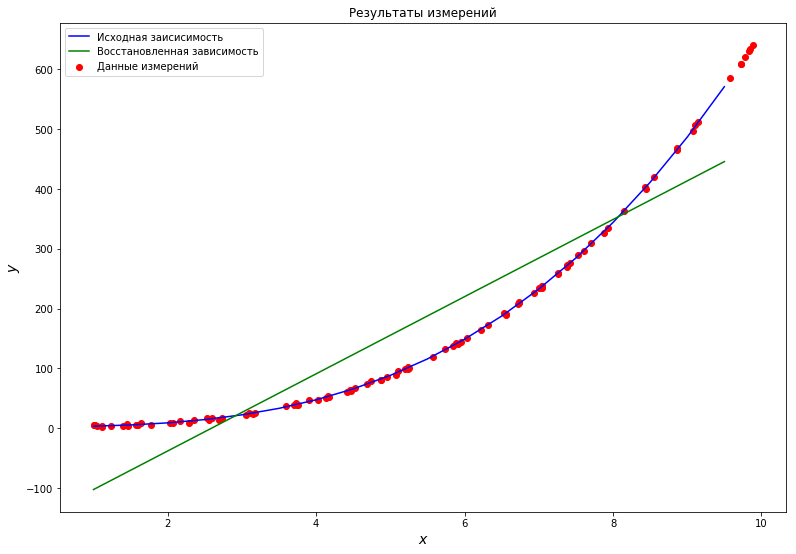

In [18]:
x = np.arange(1, 10.0, 0.5)
plt.figure(figsize=(13, 9))
plt.title('Результаты измерений')
plt.xlabel(r'$x$',fontsize=14)
plt.ylabel(r'$y$',fontsize=14)
plt.scatter(__xRegression2__, __yRegression2__, c='r')
plt.plot(x,y2(x),c='b')
plt.plot(x,f(x),c='g')
plt.legend(['Исходная заисисимость','Восстановленная зависимость','Данные измерений'])
plt.show()

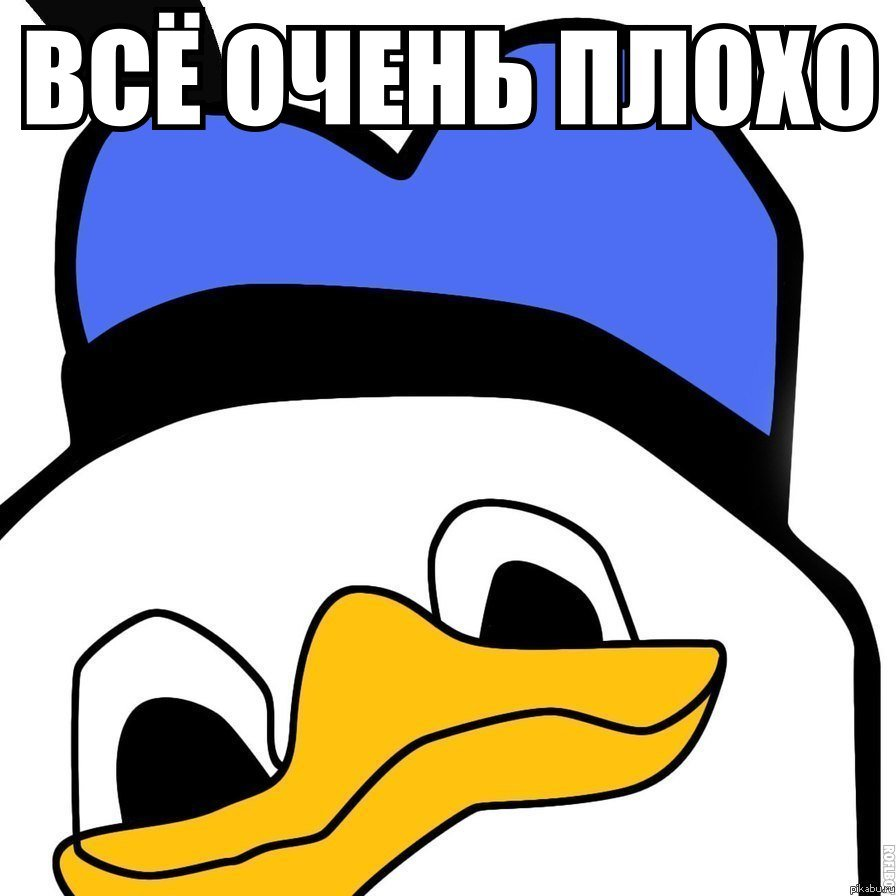

А если исскуственно добавить новый признак к исходным данным?  
Добавим столбик $x^2$

In [19]:
__xRegression2New__ =  np.hstack([__xRegression2__,__xRegression2__**2])

In [20]:
__LinearModel__.fit(__xRegression2New__,__yRegression2__)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [21]:
def f(x):
    return __LinearModel__.intercept_[0] + x * __LinearModel__.coef_[0][0] + (x**2)*__LinearModel__.coef_[0][1]

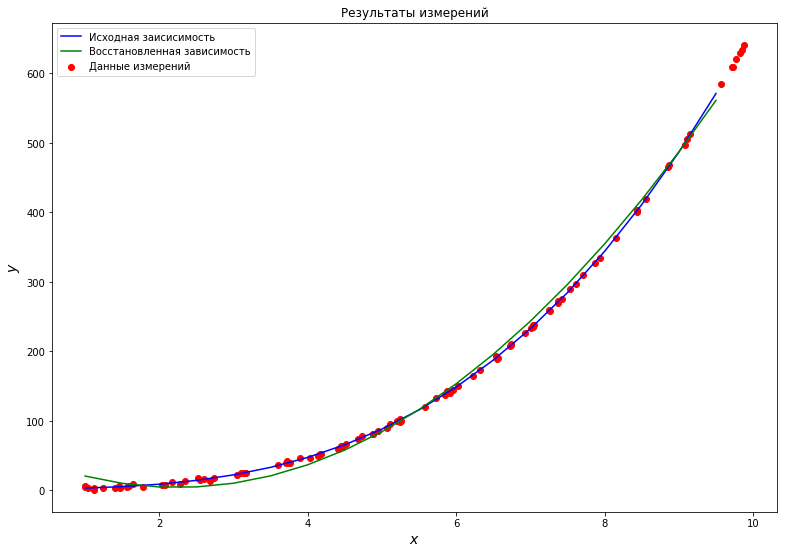

In [22]:
x = np.arange(1, 10.0, 0.5)
plt.figure(figsize=(13, 9))
plt.title('Результаты измерений')
plt.xlabel(r'$x$',fontsize=14)
plt.ylabel(r'$y$',fontsize=14)
plt.scatter(__xRegression2__, __yRegression2__, c='r')
plt.plot(x,y2(x),c='b')
plt.plot(x,f(x),c='g')
plt.legend(['Исходная заисисимость','Восстановленная зависимость','Данные измерений'])
plt.show()

В итоге даже приблежение исходной функции 3 степени функцией 2 степени неплохо работает
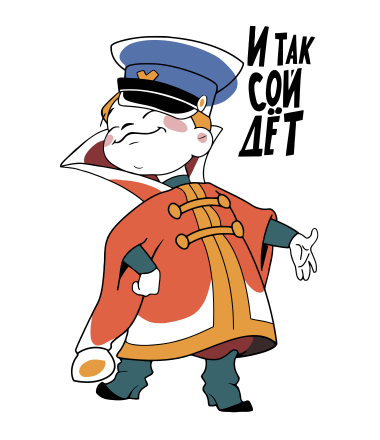

# <Center> Дерево решений для задачи регрессии 

Сказать что такое дерево решений сложно - проще показать:  
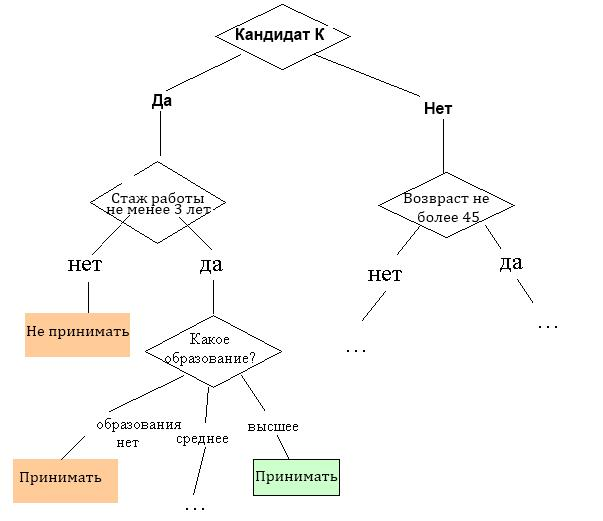
Посмотрим как будет выглядить решение задачи регрессии на графике на той же задачи

In [23]:
__TreeRegresion__ = DecisionTreeRegressor()

In [24]:
__TreeRegresion__.fit(__xRegression__,__yRegression__)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

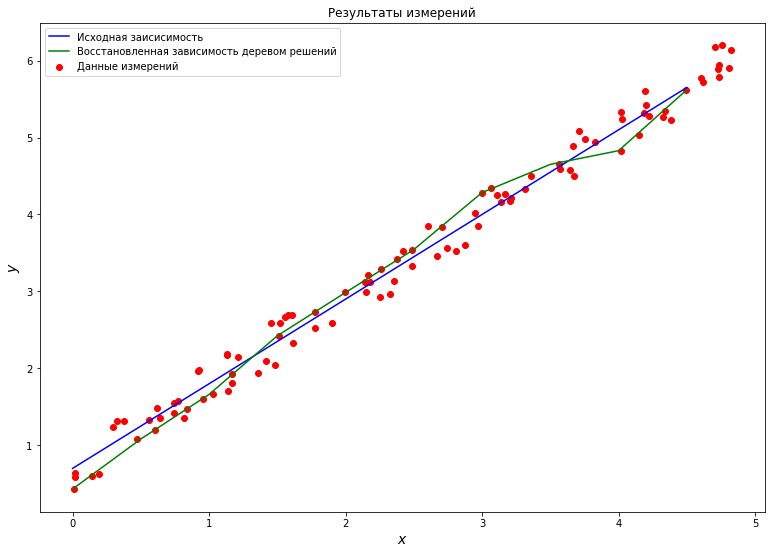

In [25]:
x = np.arange(0, 5.0, 0.5)
plt.figure(figsize=(13, 9))
plt.title('Результаты измерений')
plt.xlabel(r'$x$',fontsize=14)
plt.ylabel(r'$y$',fontsize=14)
plt.scatter(__xRegression__, __yRegression__, c='r')
plt.plot(x,y(x),c='b')
plt.plot(x,__TreeRegresion__.predict(x.reshape(-1,1)),c='g')
plt.legend(['Исходная заисисимость','Восстановленная зависимость деревом решений','Данные измерений'])
plt.show()

# <Center> Задача классификации  
Задача классификации заключается в том, чтобы отнести объекты к каким-либо категориям, например, вернет ли заемщик кредит или нет, классифицировать картинки котиков по породам и так далее  
В качестве примера будем расматривать уже классический пример с цветками ирисов - с этого примера и началось все машинное обучение
# <center> Дерево решений для задачи классификации

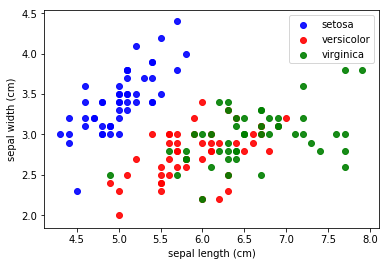

In [26]:
iris = datasets.load_iris()

X = iris.data # данные
y = iris.target # классы
y_names = iris.target_names # название вида ириса
feature_names = iris.feature_names # названия признаков

j1 = 0 # будем строить классификатор по двум признакам
j2 = 1
# Посмотрим на данные

plt.scatter(X[y == 0, j1], X[y == 0, j2], color = 'b', label = y_names[0], alpha = 0.9)
plt.scatter(X[y == 1, j1], X[y == 1, j2], color = 'r', label = y_names[1], alpha = 0.9)
plt.scatter(X[y == 2, j1], X[y == 2, j2], color = 'g', label = y_names[2], alpha = 0.9)
plt.xlabel(feature_names[j1])
plt.ylabel(feature_names[j2])

plt.legend(loc = 'best')

In [27]:
X = X[:, [j1, j2]] # строим матрицу признаков, используем два признака

In [28]:
__TreeModel__ = DecisionTreeClassifier()
__TreeModel__.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
def get_grid(data): 
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), # создаем координатную матрицу c шагом 0.01
                         np.arange(y_min, y_max, 0.01))

Text(0,0.5,'sepal width (cm)')

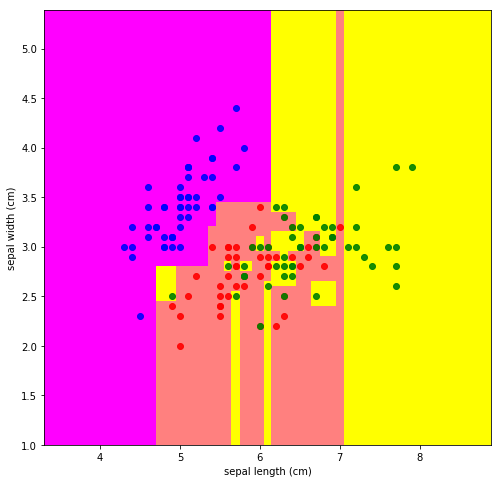

In [30]:
xx, yy = get_grid(X)

predicted = __TreeModel__.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.pcolormesh(xx, yy, predicted, cmap='spring')
plt.scatter(X[y == 0, j1], X[y == 0, j2], color = 'b', label = y_names[0], alpha = 0.9)
plt.scatter(X[y == 1, j1], X[y == 1, j2], color = 'r', label = y_names[1], alpha = 0.9)
plt.scatter(X[y == 2, j1], X[y == 2, j2], color = 'g', label = y_names[2], alpha = 0.9)
plt.xlabel(feature_names[j1])
plt.ylabel(feature_names[j2])

# <center> Логистическая регрессия

In [31]:
__LogictocModel__ = LogisticRegression(n_jobs=-1)
__LogictocModel__.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
def line(x,mode = 0):
    return  - (__LogictocModel__.intercept_[mode] + x*__LogictocModel__.coef_[mode][0])/ __LogictocModel__.coef_[mode][1]

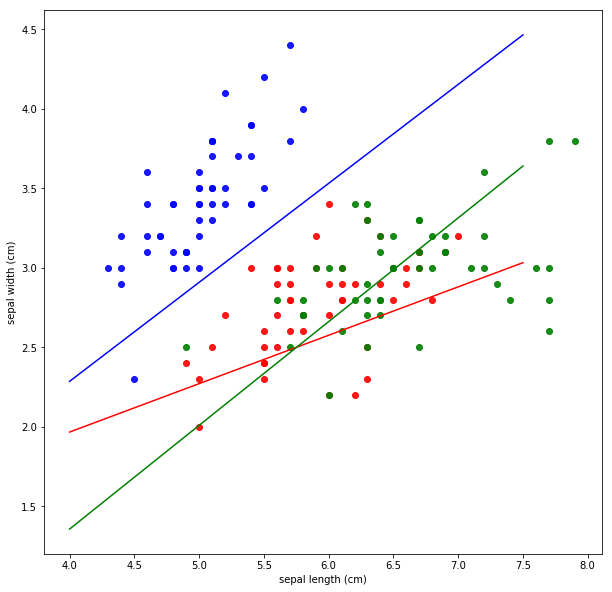

In [33]:
x = np.arange(4,8, 0.5)
plt.figure(figsize=(10,10))
plt.scatter(X[y == 0, j1], X[y == 0, j2], color = 'b', label = y_names[0], alpha = 0.9)
plt.scatter(X[y == 1, j1], X[y == 1, j2], color = 'r', label = y_names[1], alpha = 0.9)
plt.scatter(X[y == 2, j1], X[y == 2, j2], color = 'g', label = y_names[2], alpha = 0.9)
plt.xlabel(feature_names[j1])
plt.ylabel(feature_names[j2])
plt.plot(x,line(x,0),color ='b')
plt.plot(x,line(x,1),color ='r')
plt.plot(x,line(x,2),color ='g')
plt.show()

О чем мы умолчали, чтобы не травмировать вас:  
О том, что внутри алгоритма  
О регуляризации -  то есть 'наказание' для алгоритма за слишком большие веса  
О переобучение - когда алгоритм слишком подгоняется под данные

# <center> Переобучение

In [40]:
x = np.sort(np.random.uniform(0,5,size=(10,1)))

In [44]:
x

array([[3.90376476],
       [2.70773809],
       [1.37221512],
       [3.11788716],
       [2.82324759],
       [3.94514609],
       [0.76769008],
       [0.02842145],
       [3.05270662],
       [4.43459543]])

In [41]:
def y(x):
    return x**2+x*0.2+0.3

In [42]:
Y = y(x) + np.random.uniform(-.3,.3,size=(10,1))

In [61]:
__LinearModel__.fit(x,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

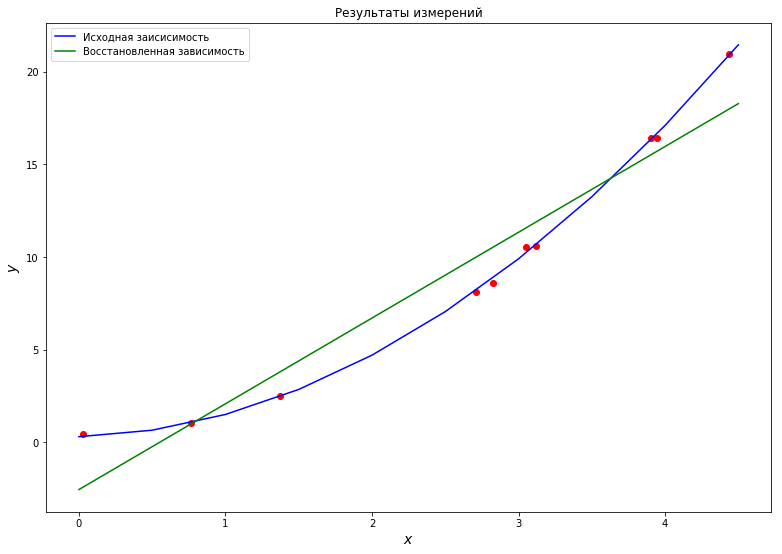

In [62]:
X = np.arange(0, 5.0, 0.5)
plt.figure(figsize=(13, 9))
plt.title('Результаты измерений')
plt.xlabel(r'$x$',fontsize=14)
plt.ylabel(r'$y$',fontsize=14)
plt.scatter(x, Y, c='r')
plt.plot(X,y(X),c='b')
plt.plot(X,__LinearModel__.predict(X.reshape(-1, 1)),c='g')
plt.legend(['Исходная заисисимость','Восстановленная зависимость'])
plt.show()

Добавим больше признаков

In [57]:
def moreX(x):
    return np.hstack([x,x**2,x**3,x**4,x**5,x**6,x**7,x**8,x**9,x**10])

In [58]:
__LinearModel__.fit(moreX(x),Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

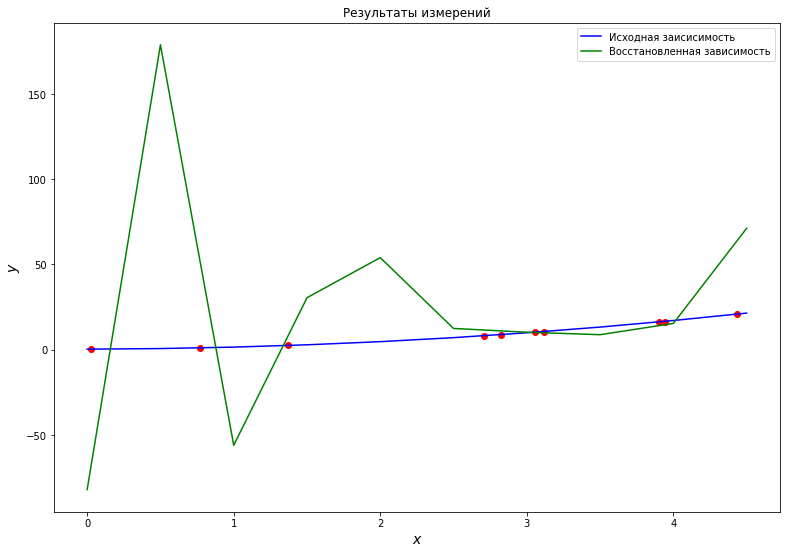

In [59]:
X = np.arange(0, 5.0, 0.5)
plt.figure(figsize=(13, 9))
plt.title('Результаты измерений')
plt.xlabel(r'$x$',fontsize=14)
plt.ylabel(r'$y$',fontsize=14)
plt.scatter(x, Y, c='r')
plt.plot(X,y(X),c='b')
plt.plot(X,__LinearModel__.predict(moreX(X.reshape(-1, 1))),c='g')
plt.legend(['Исходная заисисимость','Восстановленная зависимость'])
plt.show()